In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color


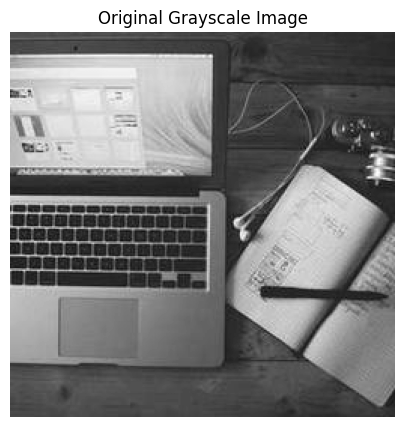

In [2]:
# 1. Load an Image (grayscale image)
# You can use any grayscale image, here using a sample image from skimage
# Replace with your own image if needed
image = io.imread('https://picsum.photos/256/256')  # Example image
image_gray = color.rgb2gray(image)  # Convert to grayscale if necessary

# Resize image to 256x256 if required (this can vary depending on the image)
image_gray = image_gray[:256, :256]

# Display the original image
plt.figure(figsize=(5,5))
plt.title('Original Grayscale Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# 2. Reshape the Image
# Flatten the image: treat it as a matrix and reshape to 2D where each row is a pixel
# and each column is a feature (intensity value)
image_reshaped = image_gray.reshape(-1, image_gray.shape[1])

In [4]:
# 3. Apply PCA: Perform PCA for dimensionality reduction
# We will reduce the number of principal components to various levels
def apply_pca_and_reconstruct(image_data, n_components):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(image_data)
    reconstructed_data = pca.inverse_transform(transformed_data)
    return reconstructed_data

In [5]:
# 4. Reconstruction: Reconstruct the image with different components
components_list = [5, 20, 50, 100]
reconstructed_images = []

for n_components in components_list:
    reconstructed = apply_pca_and_reconstruct(image_reshaped, n_components)
    reconstructed_images.append(reconstructed)


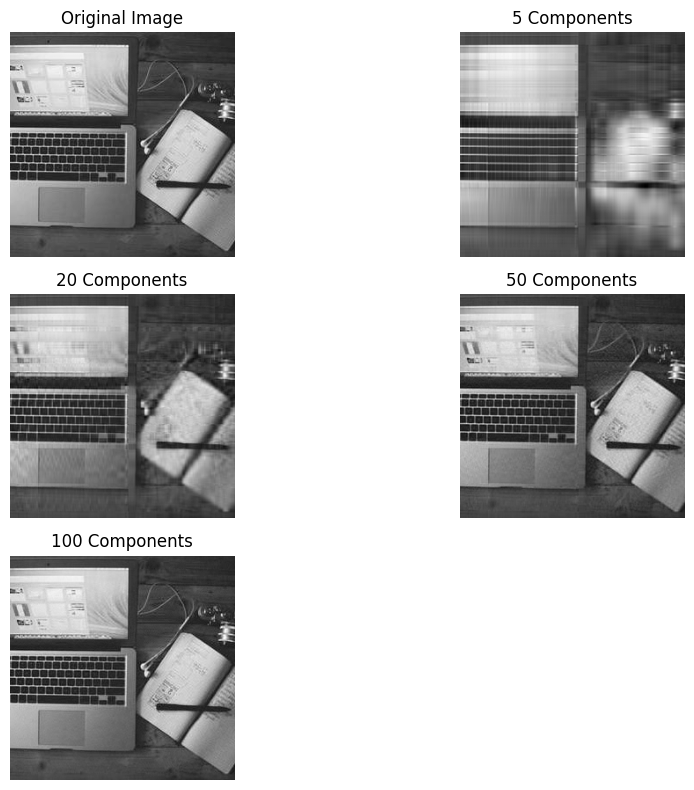

In [6]:
# 5. Visualize the Results
# Display the original and reconstructed images at different PCA levels
plt.figure(figsize=(10, 8))

# Show original image
plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

# Show reconstructed images
for i, (reconstructed, n_components) in enumerate(zip(reconstructed_images, components_list)):
    plt.subplot(3, 2, i + 2)
    plt.title(f'{n_components} Components')
    plt.imshow(reconstructed, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
